In [20]:
# to import the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import weibull_min
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [21]:
# To import the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
# To understand the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [23]:
# To convert the season in to categorical values by assigning string values for performing analysis
df.season = df.season.replace({1:"spring" , 2:"summer" , 3: "fall" , 4:"winter"})

In [24]:
# To check whether the season column is as expected 
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [25]:
# Convert the month column in to categorical variable to use for analysis
df.mnth = df.mnth.replace({1:"Jan" , 2:"Feb" , 3: "Mar" , 4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [26]:
# To check whether the Month column is as expected 
df.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [27]:
# Convert the Weekday column in to categorical variable to use for analysis
# using 0 - Tue, 1 - Wed , 2- thurs and so on based on data given
df.weekday.replace({0:"Tue",1:"Wed" , 2:"Thurs" , 3: "Fri" , 4:"Sat",5:"Sun",6:"Mon"},inplace=True)

In [28]:
# To check whether the weekday column is as expected 
df.weekday.value_counts()

Mon      105
Tue      105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: weekday, dtype: int64

In [29]:
# Convert the weathersit column in to categorical variable to use for analysis
df.weathersit.replace({1:"A" , 2:"B" , 3: "C"},inplace=True)

In [30]:
# To check whether the weathersit column is as expected 
df.weathersit.value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [31]:
# To convert the date to date time format
df.dteday = df.dteday.astype('datetime64')

In [32]:
# Auto EDA
!pip install sweetviz
import sweetviz as sv
EDA_Bike_data = sv.analyze(df)
EDA_Bike_data.show_html('EDA_Bike_data.html')

                                             |                                             | [  0%]   00:00 ->…

Report EDA_Bike_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [34]:
# All categorical variables in the dataset
df_categorical=df.select_dtypes(exclude=['float64','datetime64','int64'])
print(df_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [35]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tue,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,Sun,B
727,spring,Dec,Mon,B
728,spring,Dec,Tue,A


Boxplot of season


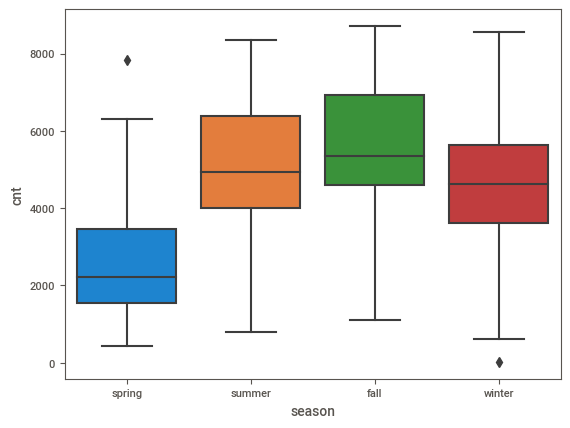

Boxplot of mnth


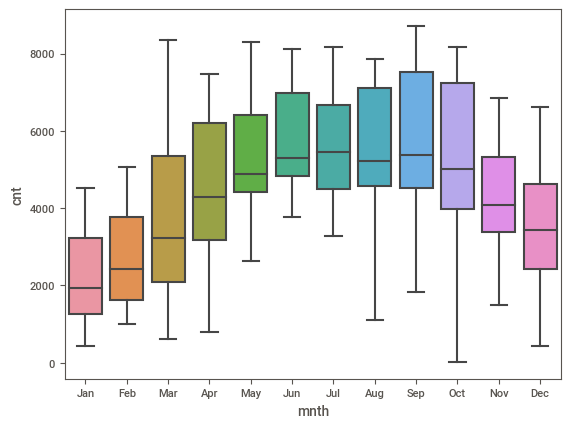

Boxplot of weekday


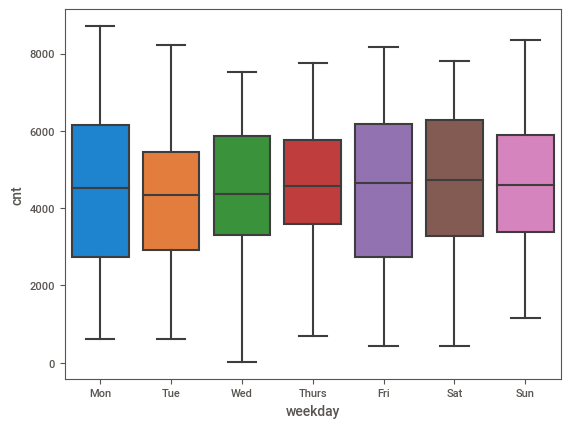

Boxplot of weathersit


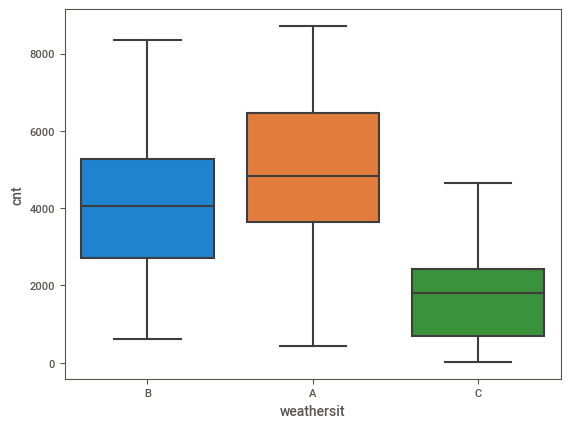

In [36]:
# To Visualize the categorical variable
for i in df_categorical:
    print("Boxplot of "+i)
    sns.boxplot(x=df[i],y='cnt',data =df)
    plt.show()

<AxesSubplot:xlabel='yr', ylabel='cnt'>

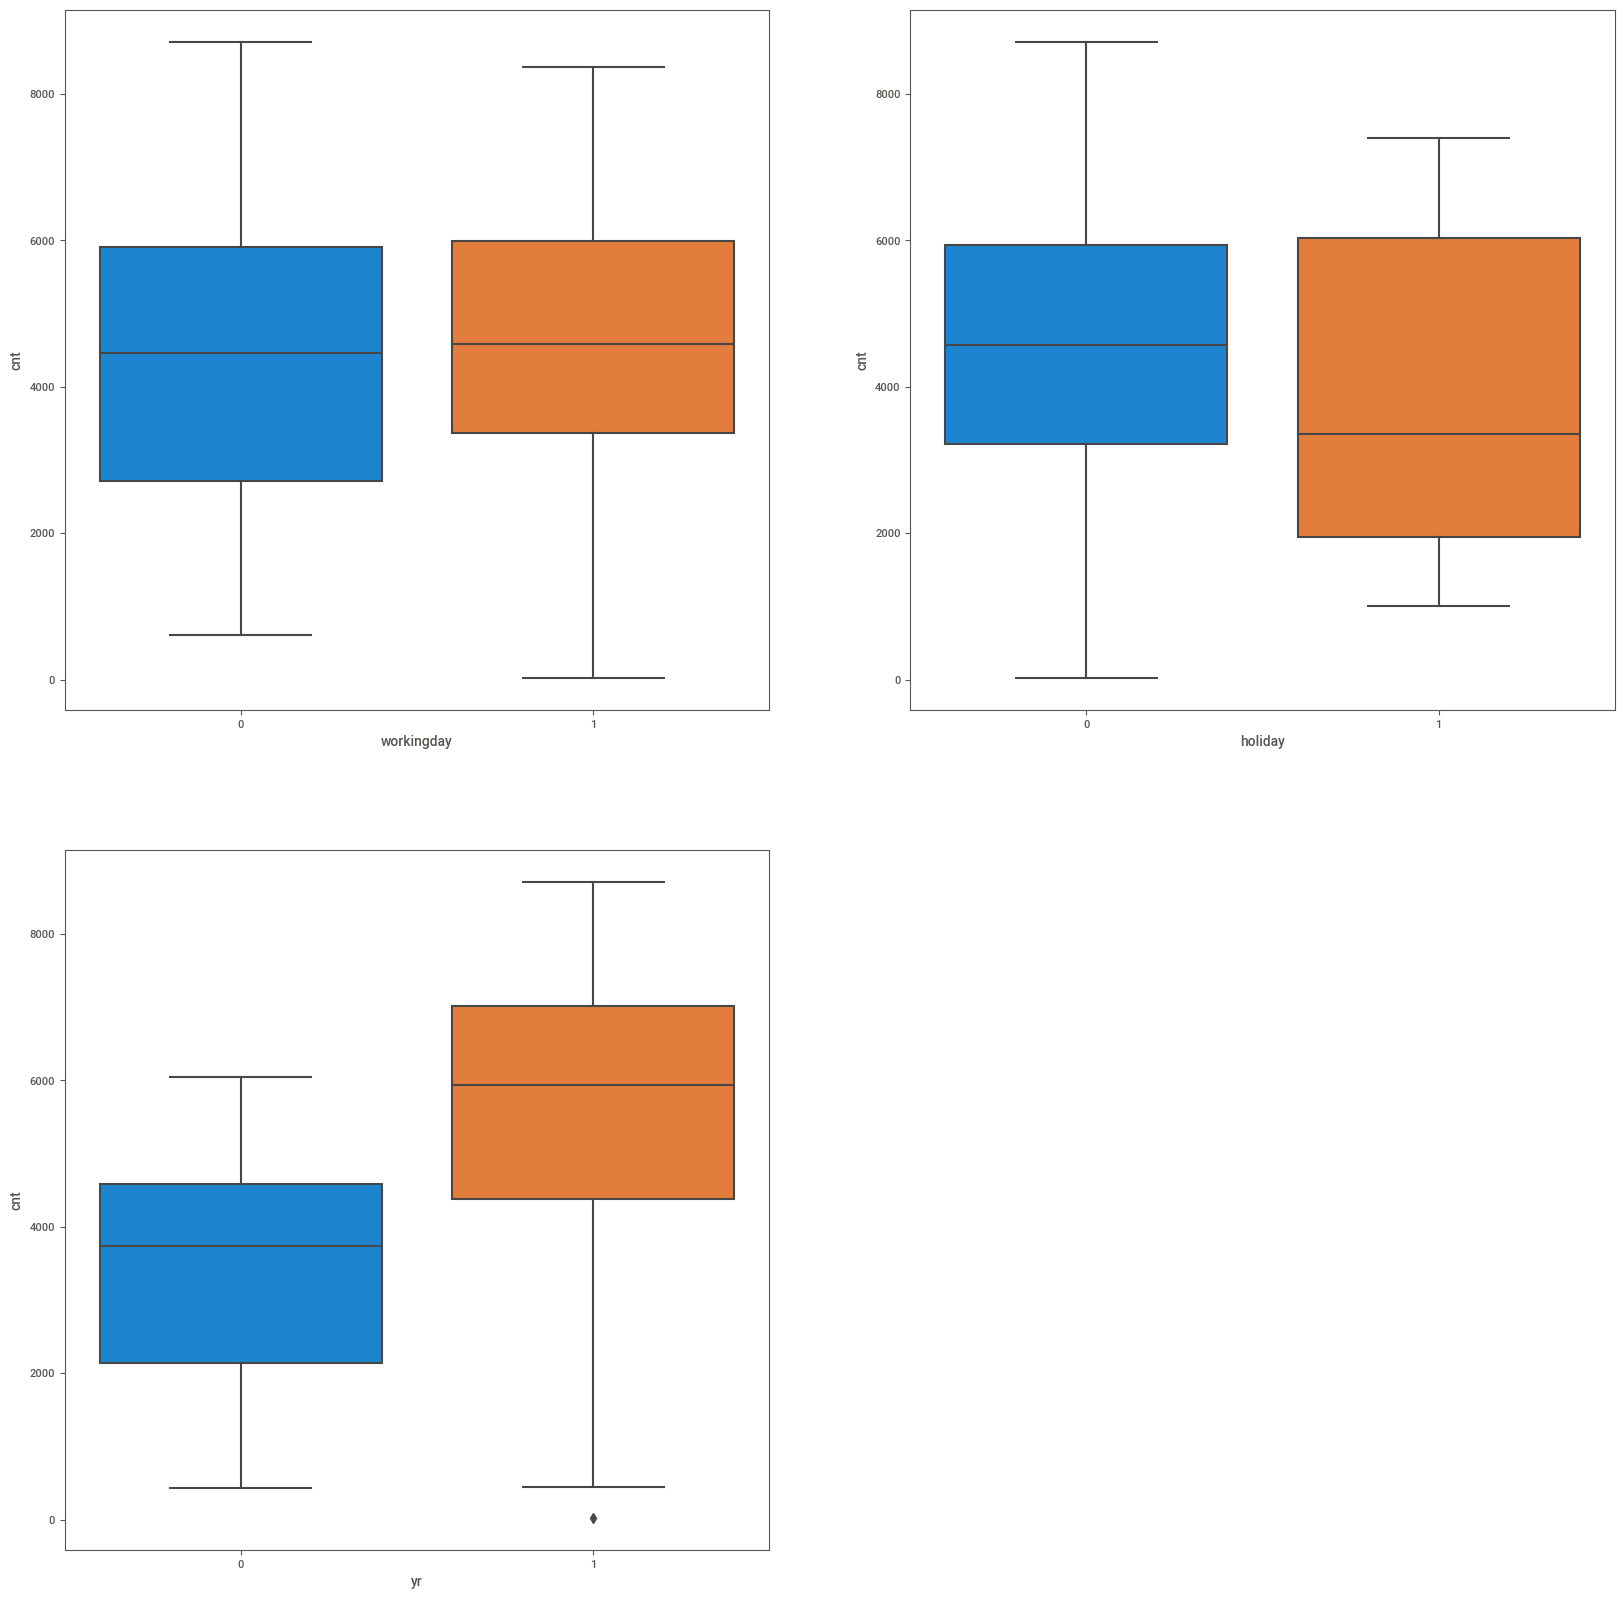

In [37]:
# To Visualize the categorical variable
plt.figure(figsize=(20, 20))  
plt.subplot(2,2,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

In [38]:
# Converting "casual","registered","cnt" float to have the required numeric variable
list_int_float = ["casual","registered","cnt"]
df[list_int_float] = df[list_int_float].astype("float")
df_numeric = df.select_dtypes(include='float64')
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


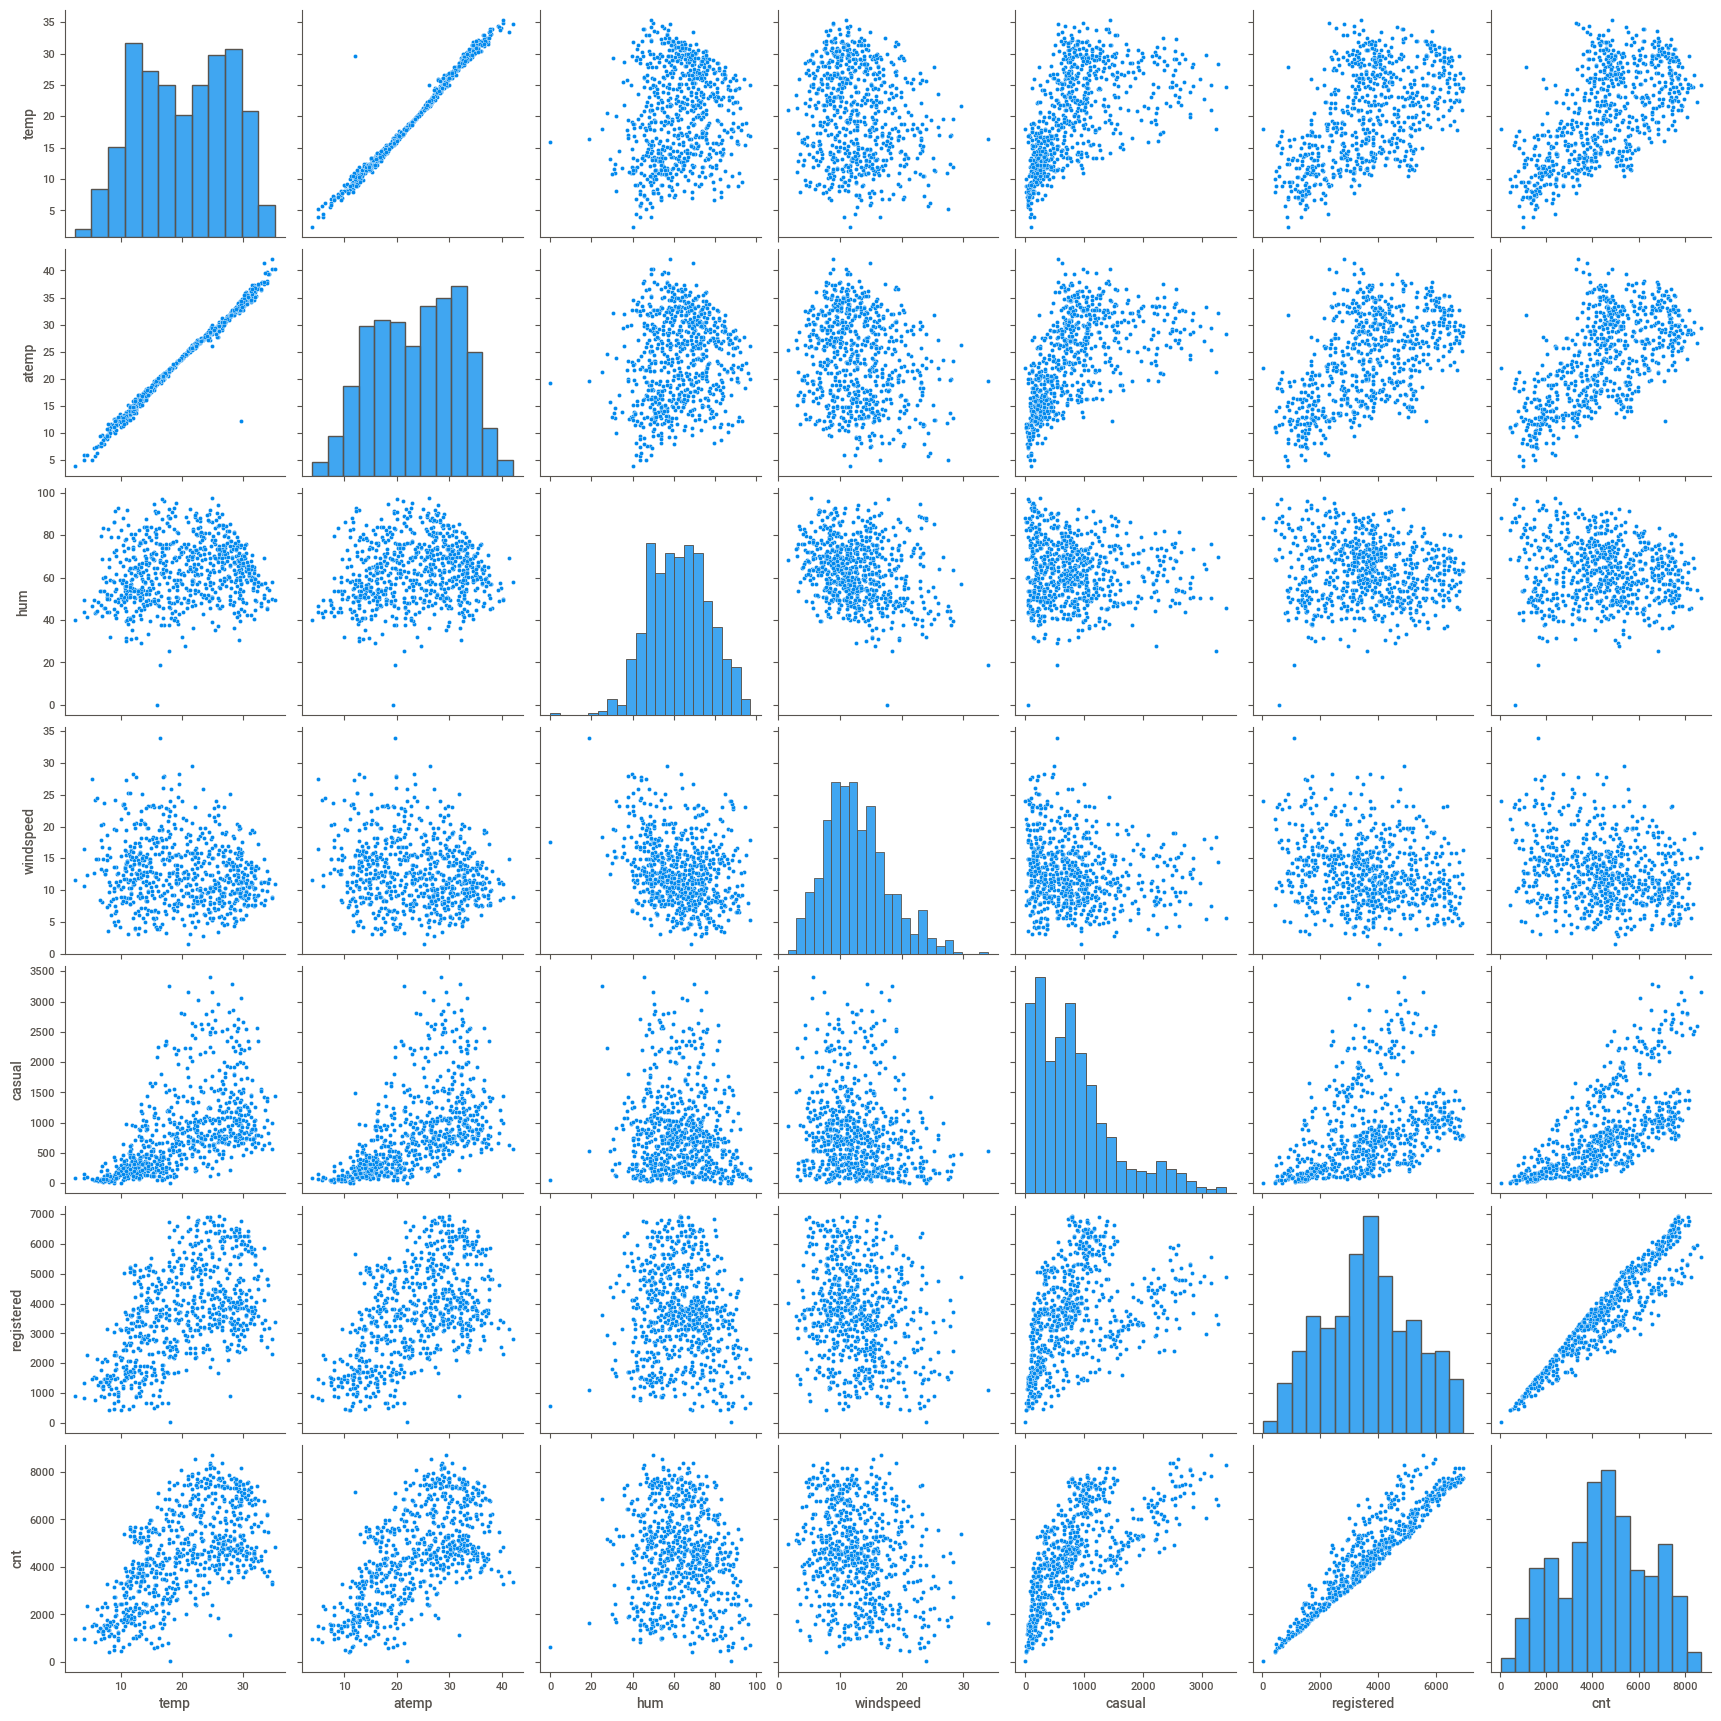

In [39]:
# Pairwise scatter plot
sns.pairplot(df_numeric)
plt.show()

<AxesSubplot:>

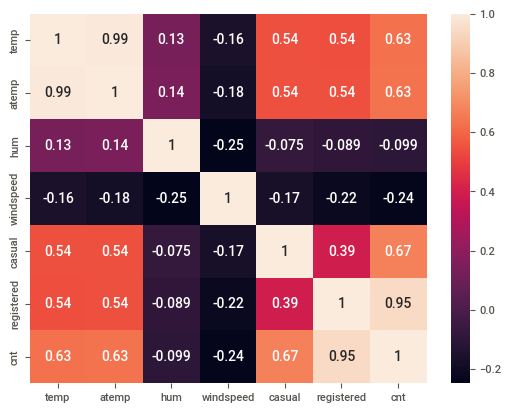

In [40]:
sns.heatmap(df_numeric.corr(),annot=True,vmax=1)

In [41]:
# Removing atemp as it highly correlated with temp
df.drop('atemp',axis=1,inplace=True)

In [42]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [43]:
# To create dummy variable for categorical variable "season","weathersit","mnth" and weekday 
#as it has different levels lets convert it to integers
df_dummies = pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# To check the columns in data frame
df_dummies.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [45]:
# To Drop the category variable
df = df.drop(df_categorical,axis=1)

In [46]:
# To concatenate the dummy variable to the data frame
df = pd.concat([df,df_dummies],axis=1)

In [47]:
# To check the columns in data frame
df.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

In [48]:
# lets drop instant,dteday,casual,registered as it will not be useful for analysis
df.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [49]:
# To check the columns in data frame
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [50]:
# Model Preparation
# To Split the data in to train and test data set
df_train,df_test = train_test_split(df,train_size=0.70 ,test_size=0.3,random_state=100)
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,7534.0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220.0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [51]:
# To Scale the columns
scaler = MinMaxScaler()

In [52]:
# Apply scaling for all the columns except dummy and column with 1 and 0
variable = ['temp', 'hum', 'windspeed', 'cnt']
df_train[variable] = scaler.fit_transform(df_train[variable])

In [53]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


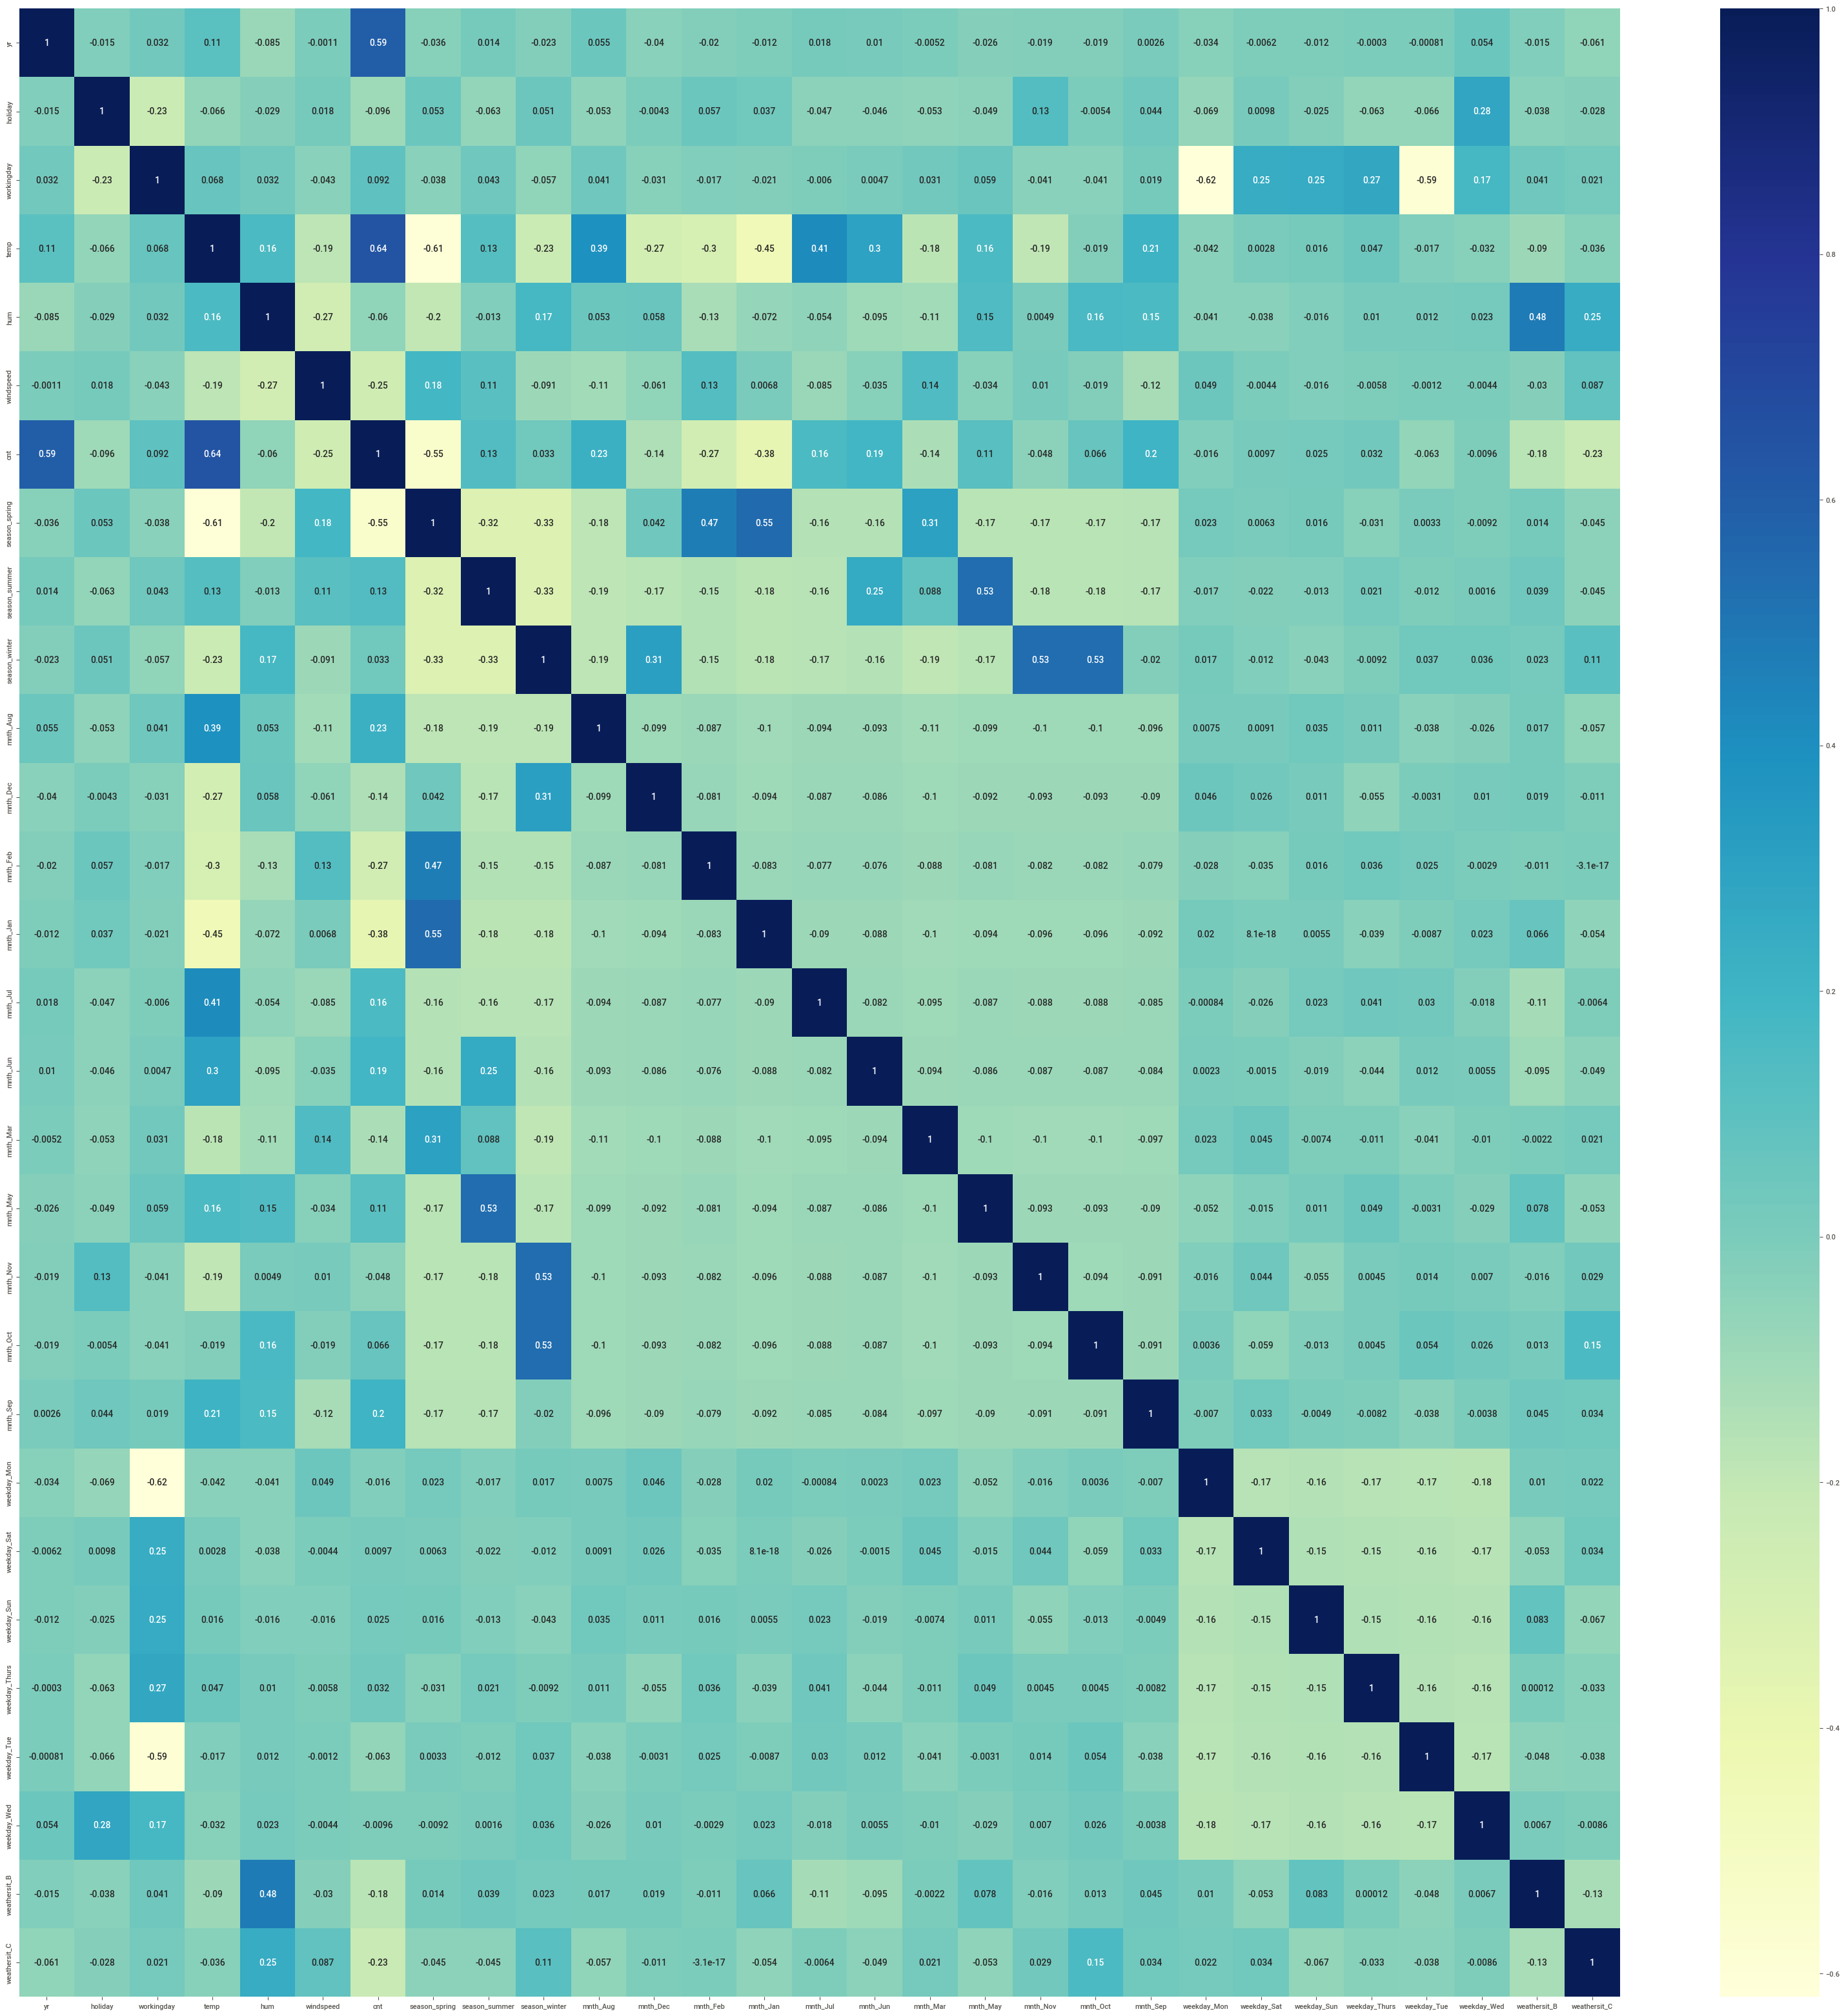

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [55]:
# To split the data in to x and y , X - all the columns , y - output columns
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [56]:
# To build the model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params

const            0.242930
yr               0.232116
holiday          0.006726
workingday       0.093651
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sep         0.081060
weekday_Mon      0.098544
weekday_Sat     -0.003849
weekday_Sun      0.005388
weekday_Thurs   -0.013502
weekday_Tue      0.044008
weekday_Wed     -0.015519
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [57]:
# Models summary 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          8.74e-182
Time:                        23:05:43   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2429      0.035      6.854      0.000       0.173       0.313
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0937      0.012      7.783      0.000       0.070       0.117
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep          0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon       0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat      -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun       0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs    -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tue       0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed      -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.34e+16
================================================================

In [58]:
# the Adjusted R2 square value is 84.5% which is good , lets have the look on by using RFE and IVF

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [60]:
# RFE with 15 features

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [61]:
# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


In [62]:

# Subset the features selected by rfe
col1 = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe = X_train[col1]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Mon,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [63]:
# Fitting the model with 15 variables and its summary
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          2.31e-191
Time:                        23:05:43   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
a=X_train_rfe.drop('const',axis=1)

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_B,2.29
0,yr,2.09
12,weekday_Mon,1.98


In [67]:
# RFE with 10 features

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe1 = RFE(lm,n_features_to_select=10)
rfe1 = rfe1.fit(X_train,y_train)
# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True False  True  True  True  True False  True False False False
 False  True False False False False False  True False False False False
 False False False  True]
[ 1  1  5  1  1  1  1  3  1 11  8  9  6  1 18 19 10  7 15  1  4 17 16 14
 12 13  2  1]


In [68]:
# Subset the features selected by rfe
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0


In [69]:
# Fitting the model with 10 variables and its summary
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.53e-184
Time:                        23:05:43   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3769      0.031     12.133

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
a1=X_train_rfe1.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = a1.columns
vif['VIF'] = [variance_inflation_factor(a1.values, i) for i in range(a1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_Jul,1.40
8,mnth_Sep,1.20
9,weathersit_C,1.11
1,holiday,1.04


In [71]:
# to Drop hum column as VIF is more than 5
X_train_rfe1.drop("hum",axis=1,inplace=True)
X_train_rfe1

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0


In [72]:
# to again run the model after dropping hum
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0


In [73]:
# to fit the model
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          5.33e-171
Time:                        23:05:43   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2042      0.025      8.095

In [74]:
a1=X_train_rfe1.drop('const',axis=1)
vif = pd.DataFrame()
vif['Features'] = a1.columns
vif['VIF'] = [variance_inflation_factor(a1.values, i) for i in range(a1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_spring,1.61
5,season_winter,1.37
6,mnth_Jul,1.34
7,mnth_Sep,1.20
8,weathersit_C,1.06
1,holiday,1.04


In [75]:
# After dropping the variables from 28 to 9 the adjusted R2 value is 80.5 % and VIF values are also less than 5 ,
#so lets proceed with this model

In [76]:
# TO perform residual analysis
y_train_cnt = lm2.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

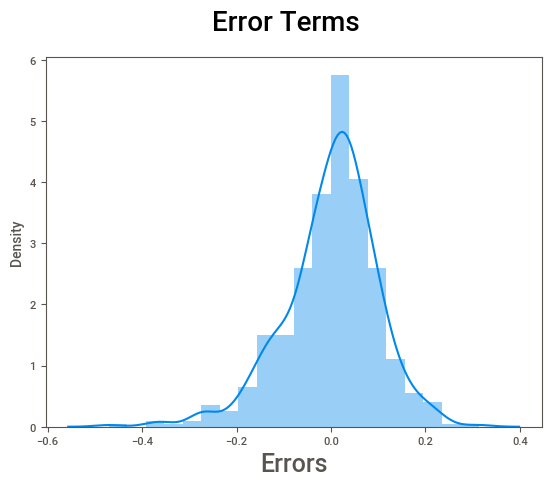

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

In [78]:
# The error terms are normally distributed and the mean of it is zero so we are good with the model lets proceed with 
# prediction with test data

In [79]:
X_train_rfe1

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_C
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0


In [80]:
# Categorical variable that we have listed
variable

['temp', 'hum', 'windspeed', 'cnt']

In [81]:
# to scale the test data set
df_test[variable] = scaler.transform(df_test[variable])

In [82]:
# assigning the values for X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
col2=a1.columns
col2

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Jul', 'mnth_Sep', 'weathersit_C'],
      dtype='object')

In [85]:
X_test_rfe1 = X_test[col2]

In [86]:
# to add a constant to the data set
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    uint8  
 6   season_winter  219 non-null    uint8  
 7   mnth_Jul       219 non-null    uint8  
 8   mnth_Sep       219 non-null    uint8  
 9   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [87]:
# Make predictions
y_pred = lm2.predict(X_test_rfe1)

Text(0, 0.5, 'y_pred')

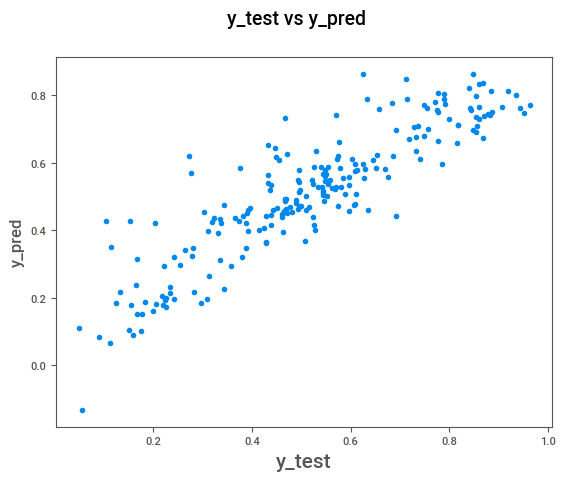

In [88]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 14)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 12) 

In [89]:
# R2 score for 9 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045293

In [90]:
# The R2 square value for train and test data are 80.5% and 78.8% and adjusted R2 for training data is 80.1% 
#which is a good fit

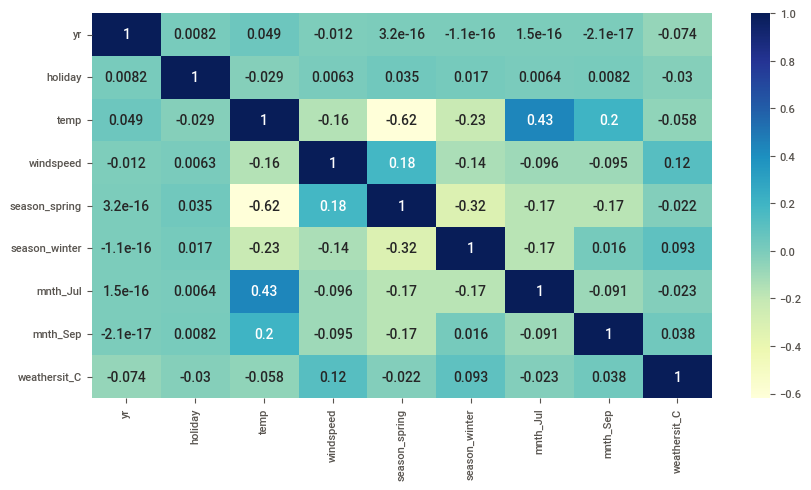

In [91]:
# Let's check the correlation coefficients of final variables 
plt.figure(figsize = (10, 5))
sns.heatmap(df[col2].corr(), annot = True, cmap="YlGnBu")
plt.show()